沿用上一次作業的參數，並且在中間多加幾層來做concatenate
神經結構的示意圖如下:
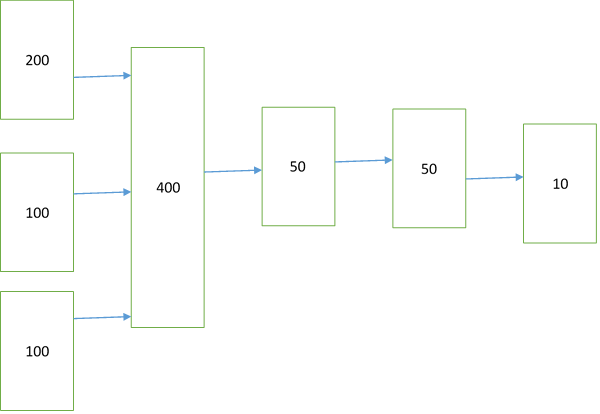

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Input,concatenate,add
from keras.optimizers import SGD,Adam
from ipywidgets import interact_manual

C:\Users\ASUS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train=x_train.reshape(60000,784)/x_train.max()
x_test=x_test.reshape(10000,784)/x_train.max()
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [5]:
f_1=Dense(200,activation='relu')
f_2=Dense(100,activation='relu')
f_3=Dense(100,activation='elu')
f_4=Dense(50,activation='relu')
f_5=Dense(50,activation='relu')
f_6=Dense(10,activation='softmax')

In [6]:
x = Input(shape=(784,))

In [7]:
h_1=f_1(x)
h_2=f_2(x)
h_3=f_3(x)
u=concatenate([h_1,h_2,h_3])
h_4=f_4(u)
h_5=f_5(h_4)
y=f_6(h_5)
model=Model(x,y)

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
concatenat

In [9]:
model.compile(loss='mse',optimizer=SGD(lr=1),metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0263 - acc: 0.8197
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0103 - acc: 0.9336
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0079 - acc: 0.9489
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0065 - acc: 0.9593
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0055 - acc: 0.9659
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0047 - acc: 0.9712
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0041 - acc: 0.9754
Epoch 8/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0036 - acc: 0.9785
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0032 - acc: 0.9812
Epoch 10/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0029 - acc: 0.9835

In [10]:
score = model.evaluate(x_test,y_test)
print("loss =",score[0])
print("正確率 =",score[1])

10000/10000 [==============================] - 0s 36us/step
loss = 0.009177053952222944
正確率 = 0.9539
